# Importing the necessary libraries :

In [194]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Creating a function to display images :

In [195]:
def display_img(img,cmap='gray'):
    fig=plt.figure(figsize=(10,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

# Reading the image and display it :

In [196]:
coins=cv2.imread('iraqi_coins.jpg')

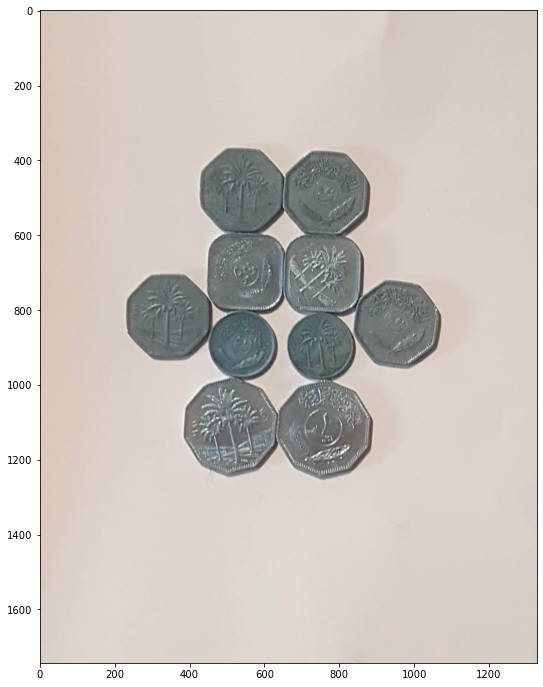

In [197]:
display_img(coins)

# To draw the contours we need to do several steps..First is to make median blur to the image :

In [198]:
coins_blur=cv2.medianBlur(coins,25)

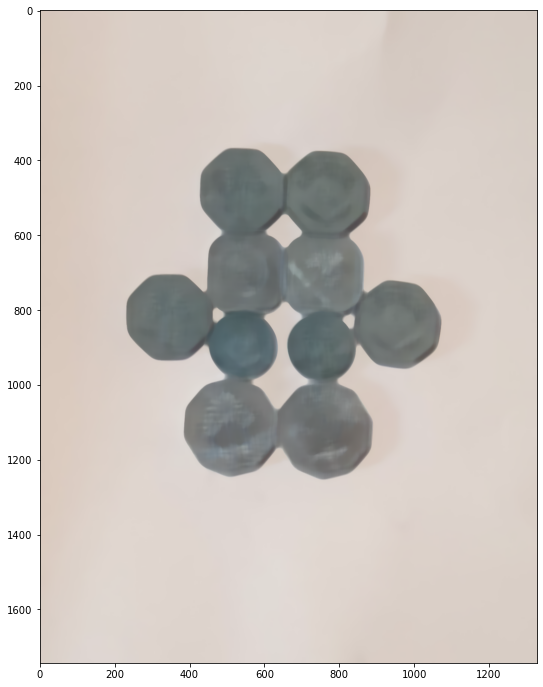

In [199]:
display_img(coins_blur)

# Next step is to convert the blured image to the gray scale :

In [200]:
gray_coins=cv2.cvtColor(coins_blur,cv2.COLOR_BGR2GRAY)

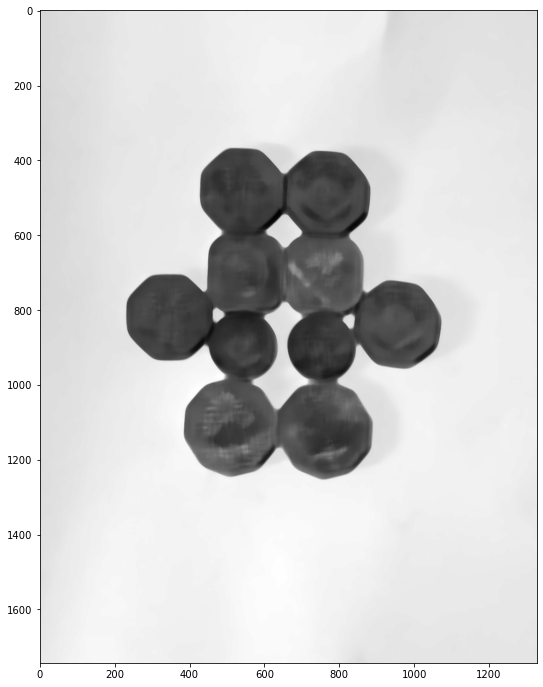

In [201]:
display_img(gray_coins)

# Now it's the time for the binary threshold :

In [202]:
ret,thresh=cv2.threshold(gray_coins,190,255,cv2.THRESH_BINARY_INV)

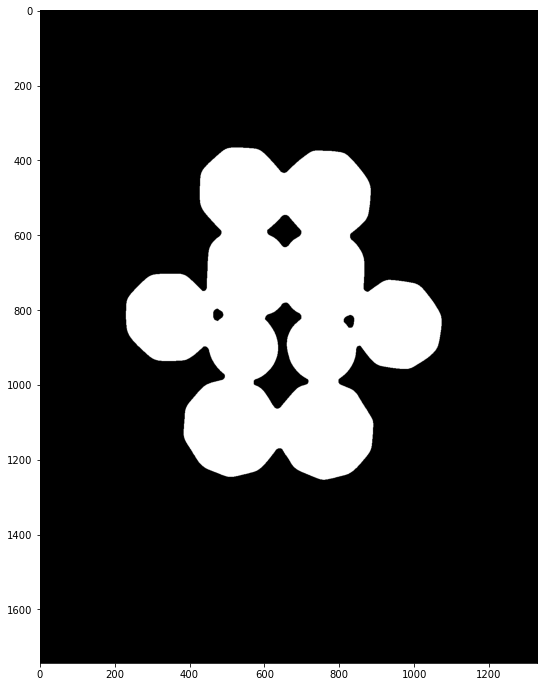

In [203]:
display_img(thresh)

# The final step is to find the contours :

In [204]:
contours,hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

# Now we will draw the contours and display it :

In [205]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(coins,contours,i,(255,0,0),10)

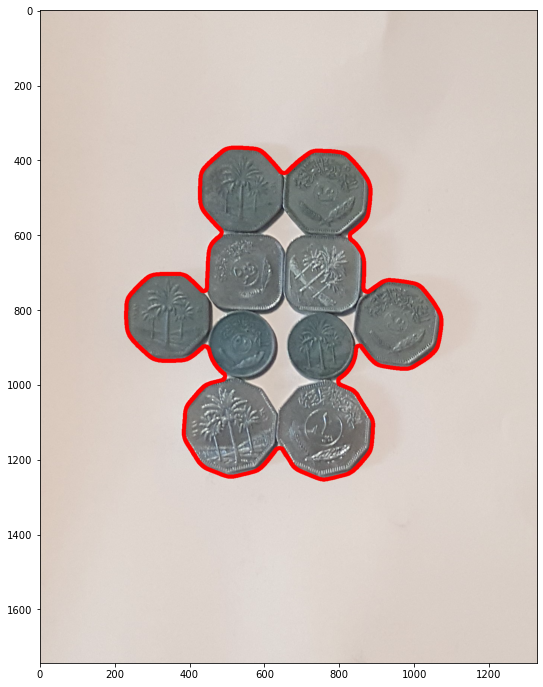

In [206]:
display_img(coins)

# Here only the external coins and not fully surrounded with red line...it has been treated as a single piece..So we should try another way..read and display the image again :

In [207]:
img=cv2.imread('iraqi_coins.jpg')

# To blur the image also :

In [208]:
img_blur=cv2.medianBlur(img,35)

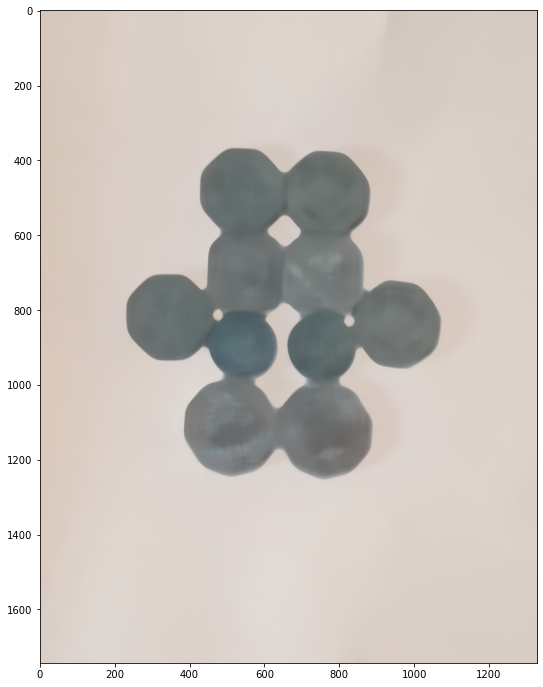

In [209]:
display_img(img_blur)

# Now it's the time to convert the blured image into gray scale :

In [210]:
gray=cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

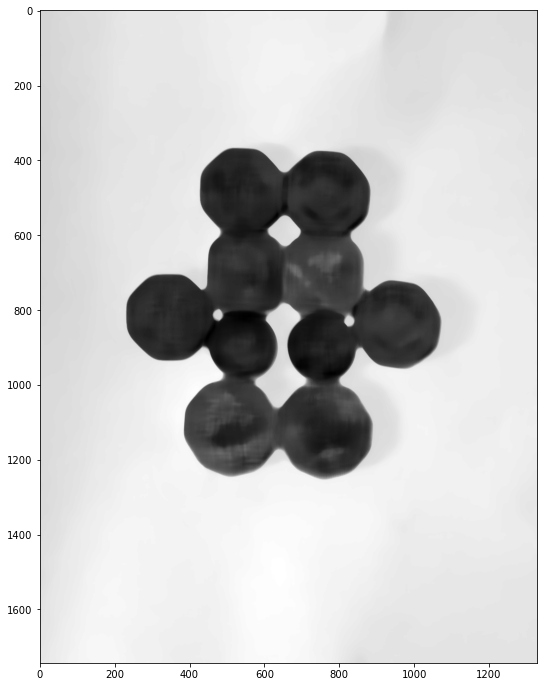

In [211]:
display_img(gray)

# Next is the time for the binary threshold :

In [268]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

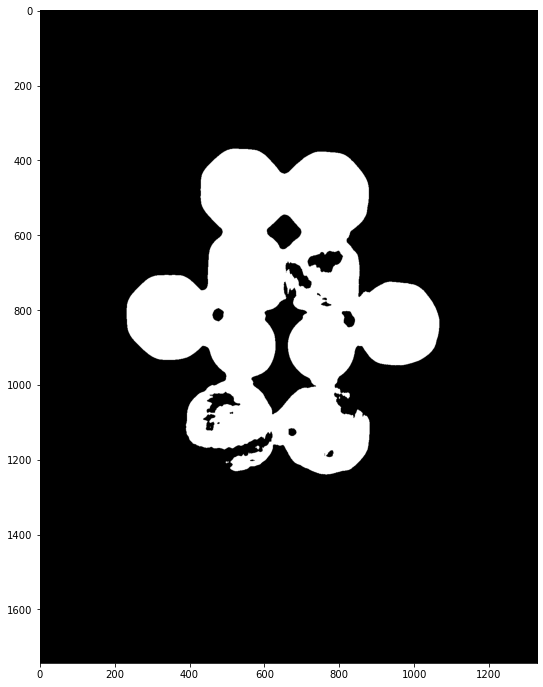

In [269]:
display_img(thresh)

# Here we see some spots within the coins..in that case we use binary threshold and thresh otsu :

In [270]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

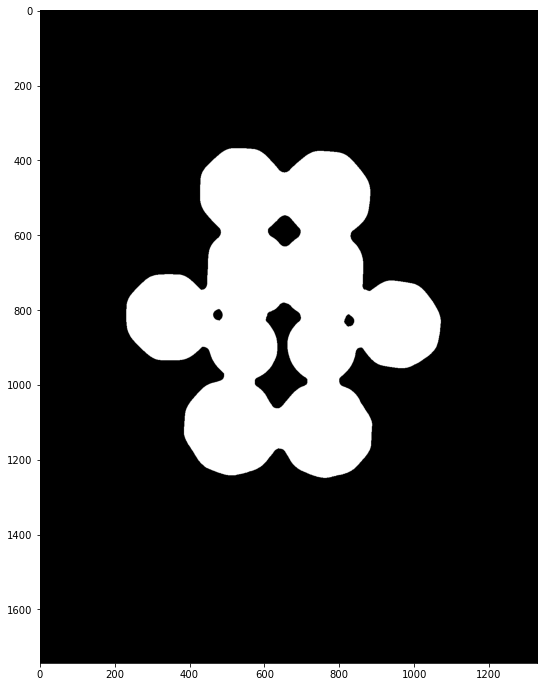

In [271]:
display_img(thresh)

# Now we create kernel :

In [272]:
kernel=np.ones((3,3),np.uint8)

In [273]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [274]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

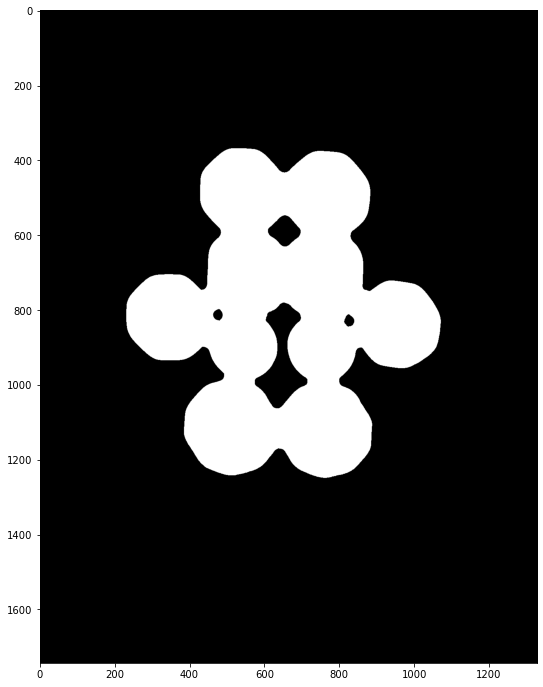

In [275]:
display_img(opening)

# Now we will use distance transform to make the thresh brighter at the center & gets less till the edges :

In [276]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

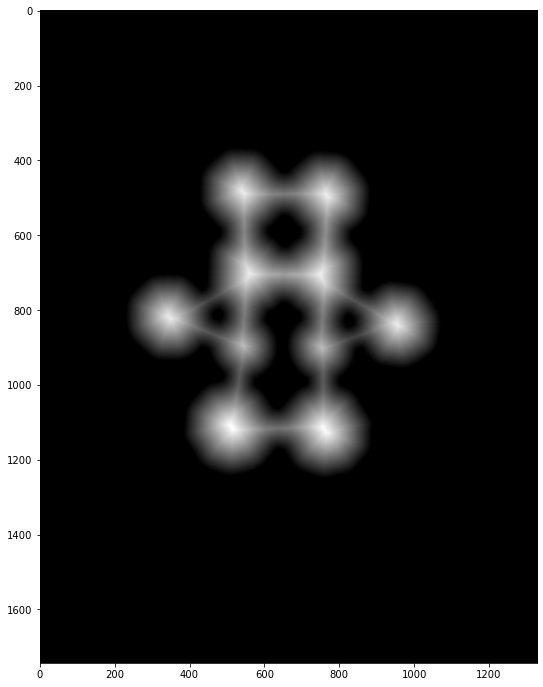

In [277]:
display_img(dist_transform)

# Now we will use the threshold dist_transform so only points will remain as foregound :

In [278]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

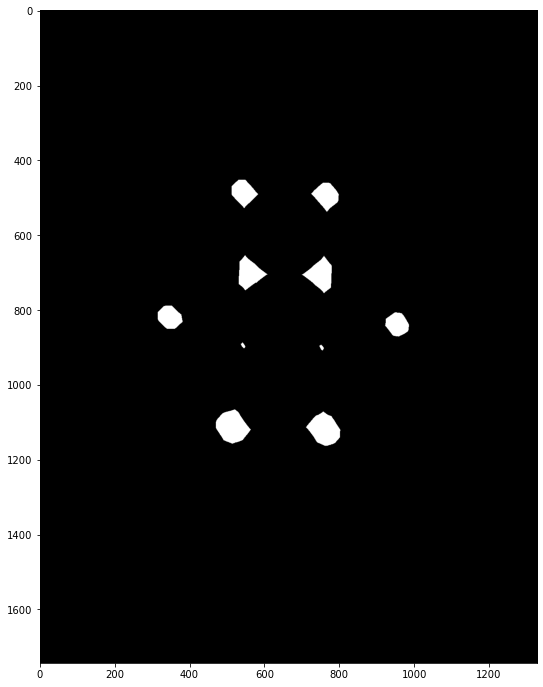

In [279]:
display_img(sure_fg)

# Also we dilate the backgound :

In [280]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

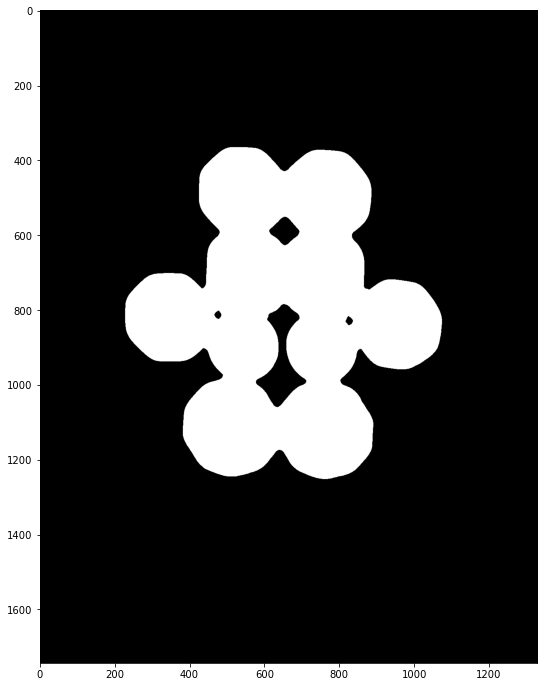

In [281]:
display_img(sure_bg)

# Let's make sure_fg as int :

In [282]:
sure_fg=np.uint8(sure_fg)

# Now it's unknown region, that's why we need the watershed to figure it out :

In [283]:
unknown=cv2.subtract(sure_bg,sure_fg)

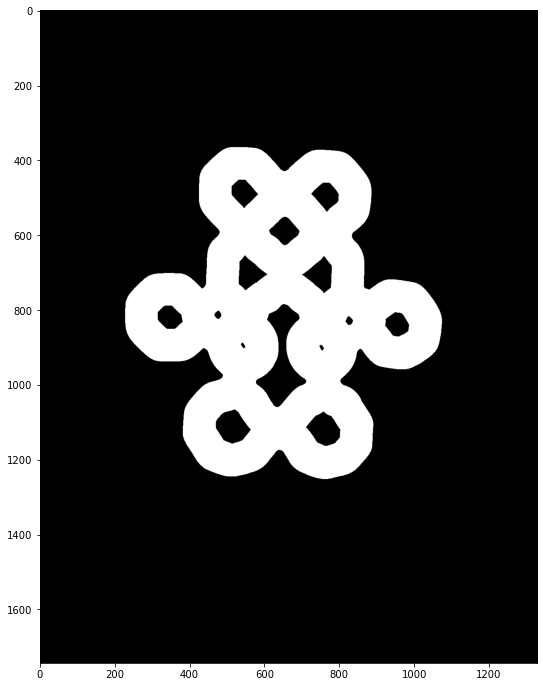

In [284]:
display_img(unknown)

# To find it out...first is to get the markers themselves :

In [285]:
ret,markers=cv2.connectedComponents(sure_fg)

In [286]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

# Now we add one to the markers :

In [287]:
markers=markers+1

# Let's make any 255 value as zero :

In [288]:
markers[unknown==255]=0

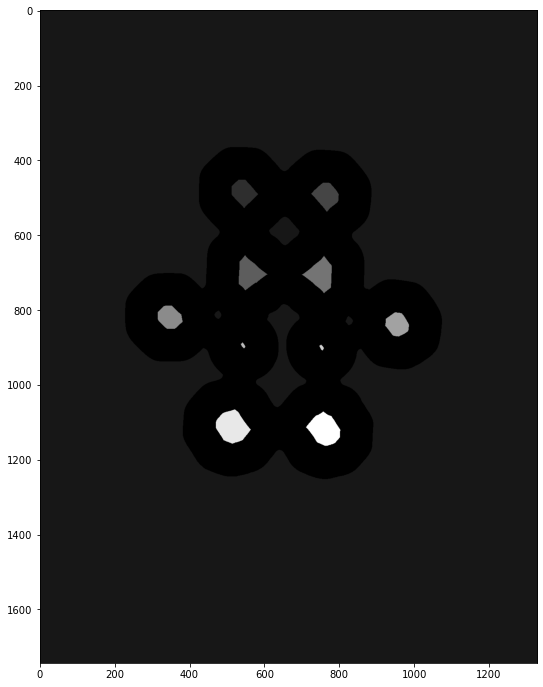

In [289]:
display_img(markers)

# Now it's the time to use watershed :

In [290]:
markers=cv2.watershed(img,markers)

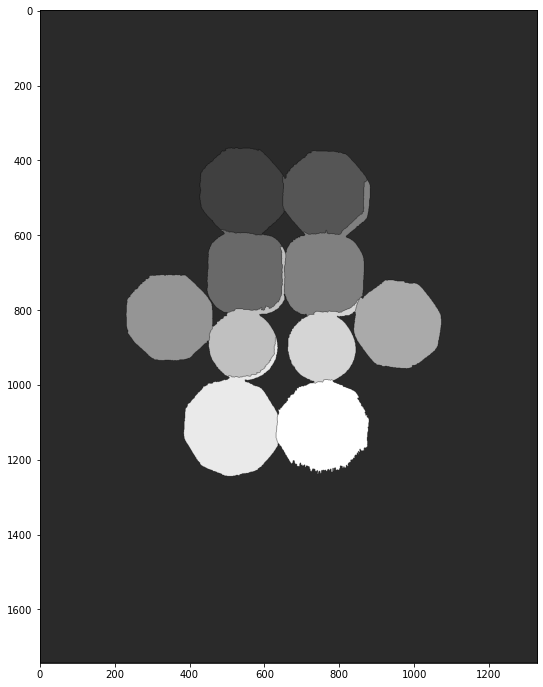

In [291]:
display_img(markers)

# Let's find the contours :

In [292]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

# And finally to draw the contours and display the image :

In [293]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(coins,contours,i,(255,0,0),10)

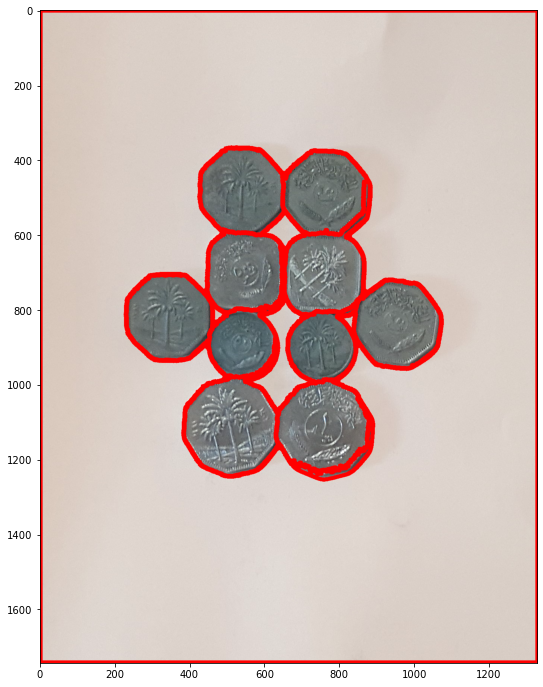

In [294]:
display_img(coins)